# Predict Customer Clicked Ads Classification by Using Machine Learning

## Import Library and Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Clicked Ads Dataset.csv')
pd.set_option('display.max_column', None)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
cat_col = df.dtypes[df.dtypes == 'object'].index
num_col = df.select_dtypes(include=['float', 'int']).columns

In [7]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [8]:
df[cat_col].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [9]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() *100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
missing_value_df

,column_name,sum_missing,percent_missing
0,Daily Time Spent on Site,13,1.3
2,Area Income,13,1.3
3,Daily Internet Usage,11,1.1
4,Male,3,0.3
1,Age,0,0.0
5,Timestamp,0,0.0
6,Clicked on Ad,0,0.0
7,city,0,0.0
8,province,0,0.0
9,category,0,0.0


## EDA

### Univariate

In [10]:
to_plot = ['Daily Time Spent on Site','Daily Internet Usage','Age','Area Income']

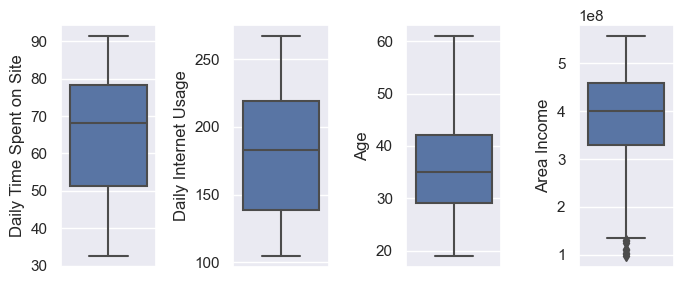

In [11]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(7,3))
for i in range(0, len(to_plot)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[to_plot[i]], orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Count'>

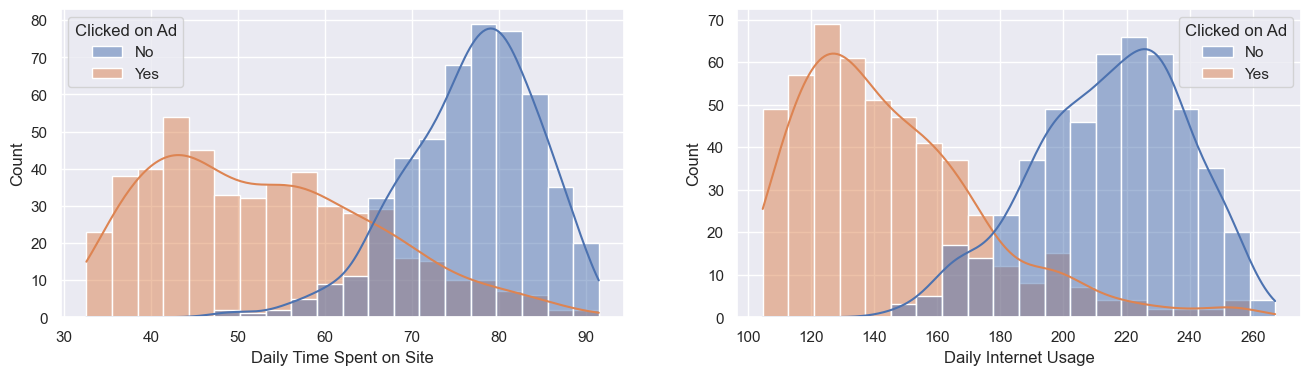

<Figure size 800x400 with 0 Axes>

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Daily Time Spent on Site', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Daily Internet Usage', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

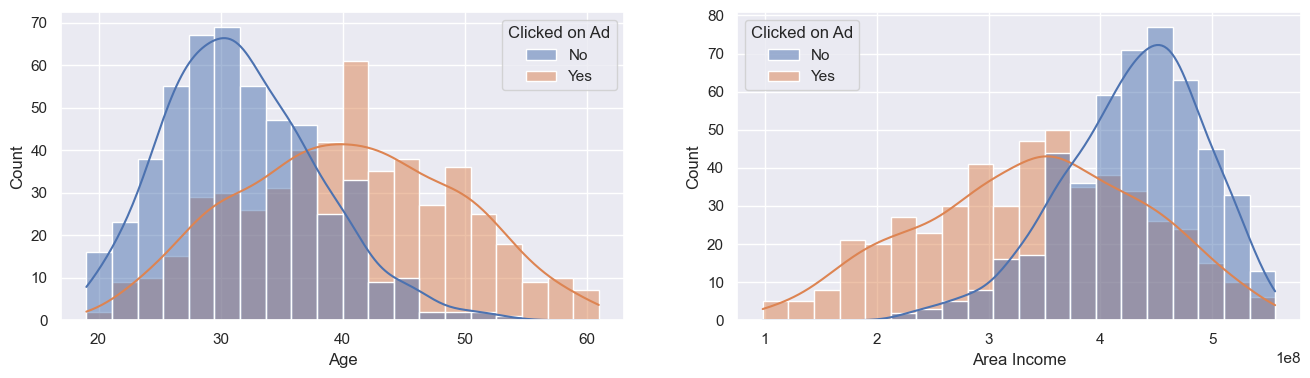

<Figure size 800x400 with 0 Axes>

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True, hue='Clicked on Ad', ax=axs[0])
sns.histplot(data=df, x='Area Income', bins=20, kde=True, hue='Clicked on Ad', ax=axs[1])

In [40]:
# Choosing only for visitors who clicked
df_clicked = df[df['Clicked on Ad'] == 'Yes']

### Visitor Characteristics

In [52]:
fig = px.histogram(df_clicked, x='Age',
                   template='plotly_dark', width=1200, height=500)
fig.show()

In [50]:
fig = px.histogram(df_clicked, x='Male',nbins=20,
                   template='plotly_dark', width=350, height=500)
fig.show()

In [49]:
fig = px.histogram(df_clicked, x='province',nbins=20,
                   template='plotly_dark',width=1200, height=500)
fig.show()

In [45]:
fig = px.histogram(df_clicked, x='category',nbins=20,
                   template='plotly_dark', width=800, height=500)
fig.show()

### Bivariate

In [14]:
fig = px.scatter(df, x='Daily Time Spent on Site', y='Age', color='Clicked on Ad',
                 template='plotly_dark', width=500, height=500)
fig.show()

In [15]:
fig = px.scatter(df, x='Daily Time Spent on Site', y='Daily Internet Usage', color='Clicked on Ad',
                 template='plotly_dark', width=500, height=500)
fig.show()

In [16]:
fig = px.scatter(df, x='Age', y='Daily Internet Usage', color='Clicked on Ad',
                 template='plotly_dark', width=500, height=500)
fig.show()

#### Catego

### Multivariate

In [19]:
hm = df[to_plot].corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=500,height=500)
fig.show()

## Preprocessing

### Duplicate Data

In [65]:
df.duplicated().sum()

0

### Missing Value

In [66]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() *100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
missing_value_df

,column_name,sum_missing,percent_missing
0,Daily Time Spent on Site,13,1.3
2,Area Income,13,1.3
3,Daily Internet Usage,11,1.1
4,Male,3,0.3
1,Age,0,0.0
5,Timestamp,0,0.0
6,Clicked on Ad,0,0.0
7,city,0,0.0
8,province,0,0.0
9,category,0,0.0


In [67]:
from sklearn.impute import SimpleImputer

In [70]:
miss_col = ['Daily Time Spent on Site','Daily Internet Usage','Area Income']
df2 = df.copy()

In [71]:
imputer = SimpleImputer(strategy= 'median')      
imputer.fit(df2[miss_col])
df2[miss_col] = imputer.transform(df2[miss_col])

In [72]:
df2.dropna(subset=['Male'], inplace=True)

In [73]:
df2.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Feature Encoding

In [90]:
df3 = df2.copy()

In [91]:
object3 = df3.dtypes[df3.dtypes == "object"].index

In [93]:
for col in object3:
    print(f'''Value count feature {col}:''')
    print(df3[col].value_counts())
    print()

Value count feature Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count feature Clicked on Ad:
Yes    499
No     498
Name: Clicked on Ad, dtype: int64

Value count feature province:
Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       209
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara                     47
Sumatra Selatan                   42
Kepulauan Riau                    34
Kalimantan Timur                  34
Sulawesi Selatan                  33
Lampung                           29
Kalimantan Selatan                23
Riau                              23
Bali                              20
Sumatra Barat                     19
Kalimantan Barat                  12
Name: province, dtype: int64

Value count feature category:
Otomotif      111
House         108
Health        104
Fashion       102
Food           99
Furniture      98
Travel         98
Electronic    

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
# Label Enconding
le = LabelEncoder()
to_label = ['Male','Clicked on Ad']
for label in to_label:
    df3[label]=df3[[label]].apply(le.fit_transform)

In [97]:
# One-Hot Encoding
to_onehot = ['province','category']
for onehot in to_onehot:
    onehots = pd.get_dummies(df3[onehot], prefix=onehot)
    df3 = df3.join(onehots)
# Drop feature yang sudah di encode
df3 = df3.drop(columns=to_onehot).copy()

### Feature Scaling

In [98]:
df4 = df3.copy()
df4.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
216,61.57,53,246777860.0,125.94,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
scaler.fit(df4)
df4 = pd.DataFrame(scaler.transform(df4),columns= df4.columns)

In [113]:
df4.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,province_Bali,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
240,0.806221,0.595238,0.153211,0.283918,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Feature Selection

In [114]:
hm = df4.corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=1000,height=1000)
fig.show()

## Modelling

In [103]:
from sklearn.model_selection import train_test_split

In [115]:
X = df4.drop(columns=['Clicked on Ad'])
y = df4['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate

def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name,
                        accuracy=round(accuracy,2),
                        recall=round(recall,2), 
                        precision=round(precision,2), 
                        f1=round(f1,2),
                        roc_auc=round(roc_auc,2),)
    return metrics_result

def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = X_train
    result['x_test'] = X_test
    del clf
    return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [124]:
model_1_result = prediction(X_train, y_train, X_test, y_test, LogisticRegression(), model_name='logistic regression')
model_2_result = prediction(X_train, y_train, X_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_3_result = prediction(X_train, y_train, X_test, y_test, KNeighborsClassifier(), model_name='kNN')
model_4_result = prediction(X_train, y_train, X_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')
model_5_result = prediction(X_train, y_train, X_test, y_test, AdaBoostClassifier(random_state=42), model_name='adaboost')
model_6_result = prediction(X_train, y_train, X_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')
model_7_result = prediction(X_train, y_train, X_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')

In [125]:
pd.DataFrame([model_1_result['train'], 
              model_2_result['train'], 
              model_3_result['train'], 
              model_4_result['train'], 
              model_5_result['train'],
              model_6_result['train'],
              model_7_result['train']])

,model_name,accuracy,recall,precision,f1,roc_auc
0,logistic regression,0.97,0.96,0.99,0.97,0.97
1,decision tree,1.00,1.00,1.00,1.00,1.00
2,kNN,0.89,0.88,0.90,0.89,0.89
3,random forest,1.00,1.00,1.00,1.00,1.00
4,adaboost,0.99,0.98,0.99,0.99,0.99
5,xgboost,1.00,1.00,1.00,1.00,1.00
6,catboost,1.00,0.99,1.00,1.00,1.00


In [126]:
pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test'], 
              model_4_result['test'], 
              model_5_result['test'],
              model_6_result['test'], 
              model_7_result['test']])

,model_name,accuracy,recall,precision,f1,roc_auc
0,logistic regression,0.96,0.94,0.97,0.96,0.96
1,decision tree,0.94,0.94,0.94,0.94,0.94
2,kNN,0.82,0.83,0.82,0.83,0.82
3,random forest,0.95,0.96,0.95,0.96,0.95
4,adaboost,0.96,0.95,0.96,0.96,0.96
5,xgboost,0.96,0.96,0.96,0.96,0.96
6,catboost,0.96,0.96,0.96,0.96,0.96
